## Exercise 2: Merging and Deriving New Columns

Skills: 
* Merge 2 dataframes
* F-strings!
* Markdown cells
* Build on groupby/agg knowledge, derive new columns, exporting
* Practice committing on GitHub

References: 
* https://docs.calitp.org/data-infra/analytics_new_analysts/01-data-analysis-intro.html
* https://docs.calitp.org/data-infra/analytics_tools/saving_code.html

In [1]:
import pandas as pd

Use of f-strings. [Read more on this](https://realpython.com/python-f-strings/#f-strings-a-new-and-improved-way-to-format-strings-in-python).

Also, click on this Markdown cell and see how to do different formatting syntax within Markdown. [Reference this](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook).

If you don't have access to Google Cloud Storage, change the path to pull from our truncated sample parquets stored in the repo.

We use [relative paths](https://towardsthecloud.com/get-relative-path-python) rather than absolute paths. Since we are in the `starter_kit` directory, we just need to go one more level in to the `data` subfolder. To get one level outside of `starter_kit`, use `../` and you'll end up in `data-analyses`. 

```
FOLDER = "./data/"
FILE_NAME = "exercise_2_3_ntd_metrics_2019.parquet"
df = pd.read_parquet(f"{FOLDER}{FILE_NAME}")

```

In [2]:
#example of f-strings, used to define df using the named variables for the read_csv command.

GCS_FILE_PATH = "gs://calitp-analytics-data/data-analyses/bus_service_increase/"
FILE_NAME = "ntd_metrics_2019.csv"

df = pd.read_csv(f"{GCS_FILE_PATH}{FILE_NAME}")

/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [3]:
#the FILE_NAME variable in this cell overrites the previous FILE_NAME in the previous cell, but keeps the iniial GCS_FILE_PATH variable

FILE_NAME = "ntd_vehicles_2019.csv"
df2 = pd.read_csv(f"{GCS_FILE_PATH}{FILE_NAME}")

In [ ]:
#shows how many rows in the df
len(df)

In [ ]:
#count of unique values in the df
df["NTD ID"].nunique()

In [ ]:
len(df2)
df2["NTD ID"].nunique()

### To do:

* Start with the `ntd_metrics_2019.csv` dataset.
* Merge in the `ntd_vehicles_2019.csv` dataset from the same location within the GCS bucket, but only keep a couple of columns.
* Print out what states there are using `value_counts`
* Subset and only keep the following states: NY, CA, TX, ID, MS
* Calculate some aggregate statistics grouping by states (the point of the exercise is to aggregate, less so on whether the stats make sense):
    * Include: sum, mean, count (of operators), nunique (of city)
    * Challenge: give a per capita measure, such as total service vehicles per 100,000 residents
* Plot the per capita measure across the 5 states (some states are very populous and some are not...per capita hopefully normalizes pop differences)

In [ ]:
#prints list of cols. in the df
list(df.columns)

In [ ]:
#returns counts of values, for a specific col in the df
#in this case; returns count of values for the "Agency" col in the df

df.Agency.value_counts()

In [5]:
# COMPLETE MERGE 2 df

# left inner join. got code example from Cal ITP docs
# start with df, then merge in df2, using inner join, 

## for 'how', should it be 'inner' or 'left'??



merge1 = pd.merge(df, df2, on = ['NTD ID', 'Agency', 'City','State', 'Legacy NTD ID'], how = 'inner')

In [6]:
keep_col = ['NTD ID', 'Agency', 'City','State', 'Legacy NTD ID','Mode', 'TOS', 'Primary UZA\n Population', 'Total Service Vehicles']
merge2 = merge1[keep_col]

In [7]:
#starting to filter down the merge2 df
#filters the merge2 df. by the State col. by criteria listed in states_list
#example syntax # df_vehicles[df_vehicles.State.isin(states_to_keep)]
states_list = ['NY','CA', 'TX', 'ID', 'MS']
merge2[merge2.State.isin(states_list)]

,NTD ID,Agency,City,State,Legacy NTD ID,Mode,TOS,Primary UZA\n Population,Total Service Vehicles
0,20008,MTA New York City Transit,New York,NY,2008,HR,DO,"18,351,295","2,297"
1,20008,MTA New York City Transit,New York,NY,2008,CB,DO,"18,351,295","2,297"
2,20008,MTA New York City Transit,New York,NY,2008,MB,DO,"18,351,295","2,297"
3,20008,MTA New York City Transit,New York,NY,2008,DR,PT,"18,351,295","2,297"
4,20008,MTA New York City Transit,New York,NY,2008,RB,DO,"18,351,295","2,297"
...,...,...,...,...,...,...,...,...,...
3647,2R02-20937,Sullivan County Transportation,Monticello,NY,2R02-042,MB,DO,0,0
3662,20213,City of Mechanicville,Mechanicville,NY,2213,MB,DO,"594,962",0
3667,90269,Los Angeles County Dept. of Public Works - Ath...,Alhambra,CA,NaN,MB,PT,"12,150,996",0
3676,9R02-91020,"City of Needles, dba: Needles Area Transit",Needles,CA,9R02-063,MB,PT,0,0


In [8]:
#COMPLETE Value Counts by state
#counts the number of times (aka frequency) each value in State col.
#only keep rows that are in states_list
#added value_counts() function at the end

merge2[merge2.State.isin(states_list)].State.value_counts()


CA    436
TX    167
NY    128
MS     29
ID     28
Name: State, dtype: int64

In [9]:
# COMPLETE
# Start of aggregate stats, grouped by states
# df 'merge2' grouped by state, then by count of Agency, decending

merge2.groupby('State').Agency.count().sort_values(ascending=False).head()

State
CA    436
TX    167
NC    160
WA    148
FL    144
Name: Agency, dtype: int64

In [10]:
# COMPLETE
# describe function on entire DF

merge2.describe()

,NTD ID,Agency,City,State,Legacy NTD ID,Mode,TOS,Primary UZA\n Population,Total Service Vehicles
count,3678,3678,3678,3678,3393,3678,3678,3678,3678
unique,2181,2167,1666,55,1966,18,2,444,118
top,10003,Massachusetts Bay Transportation Authority,Portland,CA,1003,DR,DO,0,0
freq,9,9,16,436,9,1879,2552,1686,1691


In [11]:
# COMPLETE
# on df where State == CA, group by City, then count # of agencies. Sort by descending agencies
#first part of the code (first ".") defines the df and col. then functions afterwords?

CA_modes = merge2[merge2.State=='CA'].groupby(['City', 'Mode']).Agency.count().sort_values(ascending=False).head()
CA_modes

City        Mode
Alhambra    MB      10
Visalia     DR       4
Alhambra    DR       4
Visalia     MB       4
Sacramento  DR       4
Name: Agency, dtype: int64

In [12]:
# COMPLETE
# on df, group by state, then find count of, # of unique of, and min values of "TOS".

merge2.groupby('State').TOS.agg(['count', 'nunique', 'min']).head()

,count,nunique,min
State,,,
AK,34,2,DO
AL,49,2,DO
AR,26,2,DO
AS,2,1,DO
AZ,55,2,DO


<AxesSubplot:xlabel='City'>

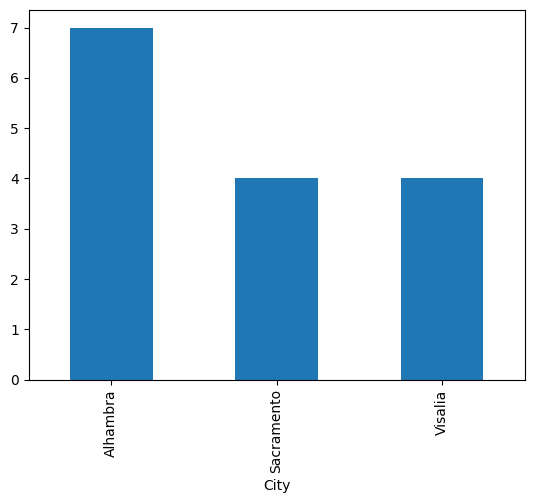

In [13]:
#COMPLETE
#makeing a chart with matplotlib
# uses CA modes tables to make a bar chart of the data

import matplotlib as plt
CA_modes.groupby('City').mean().plot(kind='bar')

### Helpful Hints and Best Practices

* Start with comprehensive approach in writing down all the lines of code to clean data. 
* Once the data cleaning process is done, work on refining the code and tidying it to see what steps can be chained together, what steps are done repeatedly (use a function!), etc.

#### Chaining
Similar to **piping** in R, where you can pipe multiple operations in 1 line of code with `>>`, you can do a similar method of chaining in Python. There is also a `df.pipe` function, but that's slightly different.

Make use of parentheses to do this. Also, use `df.assign` (see below) so you don't run into the `SettingWithCopyWarning`, which may pop up if you decide to subset your data. 

#### Assign 
You can create new columns in place, and the warning that comes up is mostly harmless. But, `assign` also lets you chain more operations after. [More clarification.](https://pythonguides.com/add-a-column-to-a-dataframe-in-python-pandas/)
```
states_clean = (states_clean
    # Assign is similar to R dplyr's mutate
    .assign(
        # Strip leading or trailing blanks (slightly different than replace)
        # Decide if you want to replace all blanks or just leading/trailing
        Agency = (states_clean.Agency.str.strip()
                .str.replace('(', '').str.replace(')', '')
        ),
        # Do something similar for City as above
        City = states_clean.City.str.strip(),
        # Replace blanks with nothing
        State = states_clean.State.str.replace(' ', '')
    ).astype({
        "Population": int, 
        "Fare_Revenues": int,
    })
)
```

Alternatively, try it with a loop:

```
for c in ["Agency", "City"]:
    df[c] = (df[c].str.strip()
            .str.replace('(', '')
            .str.replace(')', '')
            .astype(int)
            )
```

#### Using `str.contains` with some special characters
Use backslash `\` to "escape". [StackOverflow explanation](https://stackoverflow.com/questions/48699907/error-unbalanced-parenthesis-while-checking-if-an-item-presents-in-a-pandas-d)
`states_clean[states_clean.Fare_Revenues.str.contains("\(")]`


#### Merging
If your merge results produces a `col_x` and `col_y`, add more columns to your list of merge columns, with `on = ["col1", "col2"]`.

#### Use `isin` to filter by multiple conditions

```
keep_me = ["CA", "NY", "TX"]
df2 = df[df.State.isin(keep_me)]
```